# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
#import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Target URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create data frame to hold city weather data
column_names = ("City", "Cloudliness", "Country", "Date", "Humidity", "Lat", "Lng","Max Temp", "Wind Speed")
cities_weather_df = pd.DataFrame(columns = column_names)
cities_weather_df

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [33]:
# Iterate to get city weather data in OpenWeatherMap
# city_sample_size = 500
row_index = 0
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------\n"
        )

for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        print('Processing Record', record_count, 'of Set', set_count, '|', city)
        print(weather_response.url)
        city_name = weather_json["name"]
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append Weather Data without duplicating City
        if city_name not in cities_weather_df.City.values:
            
            # Append data to df columns
            cities_weather_df.at[row_index,"City"] = city_name
            cities_weather_df.at[row_index,"Cloudliness"] = cloud
            cities_weather_df.at[row_index, "Country"] = country
            cities_weather_df.at[row_index, "Date"] = date
            cities_weather_df.at[row_index, "Humidity"] = humidity
            cities_weather_df.at[row_index, "Lat"] = latitude
            cities_weather_df.at[row_index, "Lng"] = longitude
            cities_weather_df.at[row_index, "Max Temp"] = max_temp
            cities_weather_df.at[row_index, "Wind Speed"] = wind_speed
                  
            row_index += 1
            record_count += 1
            if record_count == 50:
                set_count += 1
                record_count = 0
        
            # Delay 1 sec before next loop
            time.sleep(1)
        else:
            pass
    
    elif weather_json['cod'] == 404:
        print('City not found. Skipping...')
           
    else:
        pass

    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=busselton&units=imperial
Processing Record 2 of Set 1 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ambilobe&units=imperial
Processing Record 3 of Set 1 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=constitucion&units=imperial
Processing Record 4 of Set 1 | talas
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=talas&units=imperial
Processing Record 5 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bluff&units=imperial
Processing Record 6 of Set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=longyearbyen&units=imperial
Processing Record 7 of Set

Processing Record 4 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=thompson&units=imperial
Processing Record 5 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dikson&units=imperial
Processing Record 6 of Set 2 | poum
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=poum&units=imperial
Processing Record 7 of Set 2 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=torbay&units=imperial
Processing Record 8 of Set 2 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mount%20gambier&units=imperial
Processing Record 9 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=arraial%20do%20cabo&units=imperial
Processing Record 10 of Set 2 | vila velha
http://api.openweathermap.org/d

Processing Record 8 of Set 3 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pacific%20grove&units=imperial
Processing Record 9 of Set 3 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=puerto%20ayacucho&units=imperial
Processing Record 10 of Set 3 | dickinson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dickinson&units=imperial
Processing Record 11 of Set 3 | ingham
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=ingham&units=imperial
Processing Record 12 of Set 3 | lima
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=lima&units=imperial
Processing Record 13 of Set 3 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=katsuura&units=imperial
Processing Record 14 of Set 3 | vila franca do campo
http://api.op

Processing Record 12 of Set 4 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=provideniya&units=imperial
Processing Record 13 of Set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sitka&units=imperial
Processing Record 14 of Set 4 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=puerto%20ayora&units=imperial
Processing Record 15 of Set 4 | bani walid
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bani%20walid&units=imperial
Processing Record 16 of Set 4 | guaymas
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=guaymas&units=imperial
Processing Record 17 of Set 4 | zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zhigansk&units=imperial
Processing Record 18 of Set 4 | pringsewu
http://api.openweathermap.

Processing Record 15 of Set 5 | tocopilla
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tocopilla&units=imperial
Processing Record 16 of Set 5 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=hervey%20bay&units=imperial
Processing Record 17 of Set 5 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=nouadhibou&units=imperial
Processing Record 18 of Set 5 | padang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=padang&units=imperial
Processing Record 19 of Set 5 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=wanning&units=imperial
Processing Record 20 of Set 5 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=coihaique&units=imperial
Processing Record 21 of Set 5 | beringovskiy
http://api.openweathermap.org

Processing Record 19 of Set 6 | biak
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=biak&units=imperial
Processing Record 20 of Set 6 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=talcahuano&units=imperial
Processing Record 21 of Set 6 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=karratha&units=imperial
Processing Record 22 of Set 6 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=port%20hardy&units=imperial
Processing Record 23 of Set 6 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pisco&units=imperial
Processing Record 24 of Set 6 | aberdeen
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=aberdeen&units=imperial
Processing Record 25 of Set 6 | bonavista
http://api.openweathermap.org/data/2.5/weath

Processing Record 23 of Set 7 | belmonte
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=belmonte&units=imperial
Processing Record 24 of Set 7 | hollins
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=hollins&units=imperial
Processing Record 25 of Set 7 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=chicama&units=imperial
Processing Record 26 of Set 7 | buala
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=buala&units=imperial
Processing Record 27 of Set 7 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=richards%20bay&units=imperial
Processing Record 28 of Set 7 | forbes
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=forbes&units=imperial
Processing Record 29 of Set 7 | waipawa
http://api.openweathermap.org/data/2.5/weather

Processing Record 27 of Set 8 | taikang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=taikang&units=imperial
Processing Record 28 of Set 8 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=champerico&units=imperial
Processing Record 29 of Set 8 | puri
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=puri&units=imperial
Processing Record 30 of Set 8 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bilibino&units=imperial
Processing Record 31 of Set 8 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mahebourg&units=imperial
Processing Record 32 of Set 8 | tigre
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tigre&units=imperial
Processing Record 33 of Set 8 | buique
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 31 of Set 9 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=cidreira&units=imperial
Processing Record 32 of Set 9 | slave lake
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=slave%20lake&units=imperial
Processing Record 33 of Set 9 | talara
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=talara&units=imperial
Processing Record 34 of Set 9 | mizusawa
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mizusawa&units=imperial
Processing Record 35 of Set 9 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tessalit&units=imperial
Processing Record 36 of Set 9 | dongying
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dongying&units=imperial
Processing Record 37 of Set 9 | tuy hoa
http://api.openweathermap.org/data/2.5/w

Processing Record 34 of Set 10 | trapani
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=trapani&units=imperial
Processing Record 35 of Set 10 | beira
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=beira&units=imperial
Processing Record 36 of Set 10 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=cairns&units=imperial
Processing Record 37 of Set 10 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=viedma&units=imperial
Processing Record 38 of Set 10 | vaasa
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=vaasa&units=imperial
Processing Record 39 of Set 10 | petit goave
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=petit%20goave&units=imperial
Processing Record 40 of Set 10 | nizwa
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 38 of Set 11 | terney
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=terney&units=imperial
Processing Record 39 of Set 11 | kantang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kantang&units=imperial
Processing Record 40 of Set 11 | aneho
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=aneho&units=imperial
Processing Record 41 of Set 11 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=dunedin&units=imperial
Processing Record 42 of Set 11 | huadian
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=huadian&units=imperial
Processing Record 43 of Set 11 | pshekhskaya
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=pshekhskaya&units=imperial
Processing Record 44 of Set 11 | rincon
http://api.openweathermap.org/data/2.5/weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
cities_weather_df.to_csv(output_data_file, encoding="utf-8", index=False)
cities_weather_df.head()

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1547498880,100,-33.64,115.35,59.74,20.49
1,Ambilobe,12,MG,1547499146,89,-13.19,49.05,72.57,3.83
2,Constitucion,40,MX,1547495040,28,23.99,-104.67,68,2.24
3,Talas,75,TR,1547497200,60,38.69,35.55,41,14.99
4,Bluff,56,AU,1547498895,84,-23.58,149.07,73.96,8.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

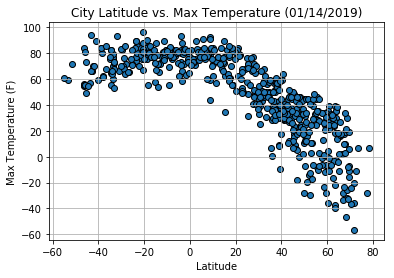

In [42]:
# Build a scatter plot City Latitude vs. Max Temperature

plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)


# Save the figure
plt.savefig("lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

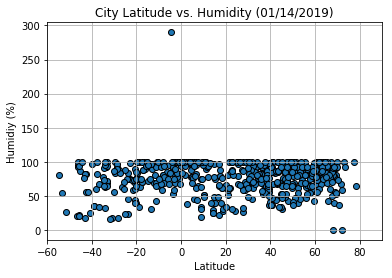

In [37]:
# City Latitude vs Humidity
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

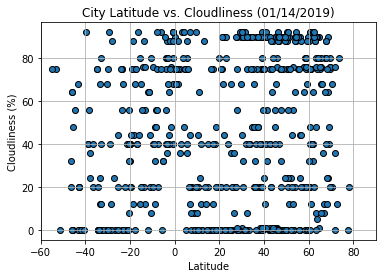

In [47]:
# City Latitude vs Cloudliness
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudliness"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Cloudliness {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Cloudliness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
         
# Save the figure
plt.savefig("lat_vs_cloudliness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

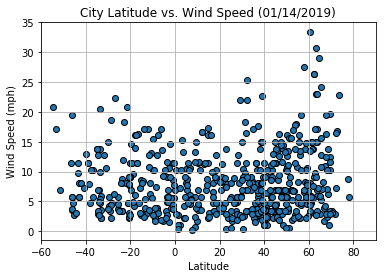

In [48]:
# City Latitude vs Wind Speed
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()